In [1]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

# A comment

from __future__ import (print_function, division, absolute_import)

import os
import glob
import copy
import sys
import warnings

import numpy as np

# Matplotlib related
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

from astropy.table import \
    Table, \
    Column, \
    vstack, \
    unique
    
from astropy.utils.metadata import MergeConflictWarning
warnings.filterwarnings('ignore', category=MergeConflictWarning, 
                        append=True)
from astropy import units as u
from astropy.coordinates import SkyCoord as sc
from astropy.utils.console import ProgressBar


In [19]:
table_hsc = Table.read('hsc_s16a_fastlane_g09_short.fits', format = 'fits')
table_decals = Table.read ('decals_dr3_g09_short.fits', format = 'fits')

ra_hsc = table_hsc['ra']
dec_hsc = table_hsc['dec']
ra_decals = table_decals['RA']
dec_decals = table_decals['DEC']

table_hsc

object_id,ra,dec,a_g,a_r,a_i,a_z,a_y,gcmodel_mag,gcmodel_mag_err,rcmodel_mag,rcmodel_mag_err,icmodel_mag,icmodel_mag_err,zcmodel_mag,zcmodel_mag_err,ycmodel_mag,ycmodel_mag_err,z_best,logm_10,logm_100,lum_5,lum_10,lum_25,lum_50,lum_75,lum_100,lum_120,lum_150,lum_max
int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
42059631182248212,138.530369357,0.640121962501,0.0782934,0.055481,0.0395947,0.0305376,0.0260574,22.1678,0.00981612,20.6153,0.00397061,19.9165,0.00182432,19.4211,0.00264946,19.2327,0.00287566,0.484470009804,10.6689951869,11.0950186702,9.33918,10.2256,10.5868,10.6478,10.6516,10.6516,10.6516,10.6516,10.6597
43114329121254273,135.665368883,1.69623473453,0.197112,0.13968,0.099684,0.0768817,0.0656024,20.4599,0.00231154,18.8919,0.000934349,18.2265,0.000587024,17.8623,0.000710077,17.6644,0.000976416,0.3133200109,10.8940269824,11.4208910342,9.51051,10.397,10.7681,10.8974,10.9211,10.9239,10.9239,10.9239,10.9239
40986237250598398,137.453280396,-0.662945194922,0.100355,0.0711145,0.0507517,0.0391425,0.0333999,21.0684,0.0035071,19.4007,0.00143617,18.6191,0.000708267,18.3282,0.00118711,18.1323,0.00150428,0.352649986744,10.6330482535,11.2068502479,9.56696,10.1466,10.4465,10.6034,10.6854,10.7204,10.7289,10.7299,10.768
42037524985562583,131.289103289,1.43557713321,0.124643,0.0883254,0.0630345,0.0486156,0.0414832,21.5892,0.00929321,19.9441,0.00331118,19.1671,0.00125063,18.7963,0.00147191,18.5975,0.00219048,0.445160001516,10.6662681418,11.16674784,9.58691,10.2262,10.6687,10.7239,10.7267,10.7267,10.7267,10.7278,10.7307
42054266768086653,138.355560755,0.309520097708,0.0833238,0.0590457,0.0421387,0.0324996,0.0277316,20.2385,0.00299308,19.0554,0.00194257,18.5649,0.000991883,18.2125,0.00149296,18.0623,0.00177547,0.303719997406,10.644464181,11.0333925944,9.67453,10.2767,10.6152,10.6572,10.6651,10.6656,10.6718,10.7043,10.7259
42059085721400150,139.328626114,0.819222974582,0.0980558,0.0694853,0.049589,0.0382457,0.0326347,20.7591,0.00269072,19.2534,0.00133189,18.6227,0.000766721,18.3844,0.0011227,18.1275,0.00118685,0.306609988213,10.7558795037,11.0443478646,9.69543,10.407,10.6081,10.6792,10.6918,10.6954,10.6965,10.7077,10.7077
40986387574448577,137.307208313,-0.206930907618,0.106767,0.0756582,0.0539944,0.0416434,0.0355339,20.4379,0.00199352,18.9286,0.00089747,18.3214,0.00048841,17.983,0.000607967,17.7631,0.00083745,0.307550013065,10.9041562357,11.625148324,9.70146,10.4313,10.7739,10.9572,11.0607,11.1522,11.1965,11.212,11.2126
43105537323191929,132.855420961,1.79018963847,0.106807,0.0756864,0.0540145,0.0416589,0.0355472,19.8966,0.00187113,18.5571,0.00120038,17.8185,0.000817144,17.4348,0.000955847,17.2791,0.00146347,0.321969985962,11.0671028522,11.4446491627,9.73473,10.6392,10.9796,11.0122,11.0159,11.0167,11.0167,11.0167,11.0184
43123692149956533,138.049508204,2.39252630476,0.0990399,0.0701826,0.0500867,0.0386296,0.0329623,21.7459,0.00783301,20.1621,0.00329249,19.316,0.00162659,18.8714,0.00237539,18.6466,0.00272365,0.371499985456,10.8694583359,11.1818639222,9.7352,10.3587,10.5892,10.6502,10.6631,10.6711,10.6711,10.6711,10.7038


In [20]:
hsc = sc(ra=ra_hsc*u.degree, dec=dec_hsc*u.degree)  
decals = sc(ra=ra_decals*u.degree, dec=dec_decals*u.degree)  
idx, d2d, d3d = hsc.match_to_catalog_sky(decals)

Now idx are indices into decals catalog that are the closest objects to each of the coordinates in hsc catalog, d2d are the on-sky distances between them, and d3d are the 3-dimensional distances. 

now we get arrays of the luminosities and plot them

In [30]:
hsc_r_mag = table_hsc['rcmodel_mag'] - table_hsc['a_r']
hsc_g_mag = table_hsc['gcmodel_mag'] - table_hsc['a_g']
hsc_z_mag = table_hsc['zcmodel_mag'] - table_hsc['a_z'] 


In [31]:
decals_r_mag = table_decals['gmag_decal'][idx]
decals_g_mag = table_decals['rmag_decal'][idx]
decals_z_mag = table_decals['zmag_decal'][idx]

In [32]:
plt.rc('text', usetex=False)

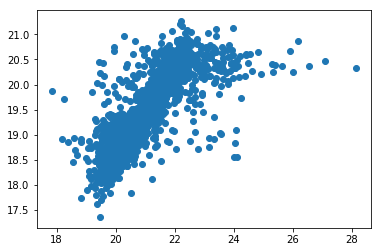

In [33]:
plt.scatter(decals_r_mag, hsc_r_mag)

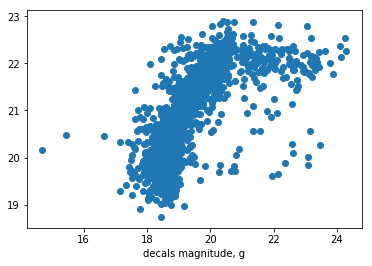

In [34]:
plt.scatter(decals_g_mag, hsc_g_mag)
plt.xlabel("decals magnitude, g")

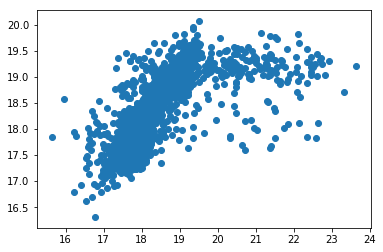

In [35]:
plt.scatter(decals_z_mag, hsc_z_mag)